### Building Model

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score,accuracy_score

In [82]:
mfp.fillna(1,inplace=True)
maccs.fillna(1,inplace=True)

In [79]:
maccs = pd.read_csv("maccs.csv",sep="\t")

In [85]:
def build_rf(df,max_features):
    X = df.drop("label",axis=1)
    y = df["label"]
    ##Splitting dataset 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
    ##Fitting to training data
    rf= RandomForestClassifier(random_state=42,max_features=max_features)
    rf.fit(X_train,y_train)
    ## training set predicition
    y_train_pred = rf.predict(X_train)
    ## test set predictions
    y_test_pred = rf.predict(X_test)
    ## 5-Fold cross validation
    cv_results = cross_validate(rf,X_train,y_train,cv=5,scoring=["precision","recall","accuracy"])
    ## Training set validation
    training_precision = precision_score(y_train,y_train_pred)
    training_recall = recall_score(y_train,y_train_pred)
    training_acc= accuracy_score(y_train,y_train_pred)
    ## Test set validation
    test_precision = precision_score(y_test,y_test_pred)
    test_recall = recall_score(y_test,y_test_pred)
    test_acc= accuracy_score(y_test,y_test_pred)
    
    return y_train_pred,y_test_pred,cv_results,training_precision,training_recall,training_acc,test_precision,test_recall,test_acc





In [86]:
mfp_rf = build_rf(mfp,90)

In [87]:
mfp_rf

(array([0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1.]),
 array([1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.

In [88]:
maccs_rf = build_rf(maccs,10)

In [89]:
maccs_rf

(array([0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1.]),
 array([1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.

In [90]:
def build_svm(df):
    X = df.drop("label",axis=1)
    y = df["label"]
    ##Splitting dataset 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
    ##Fitting to training data
    svm= SVC(kernel="poly",gamma=1)
    svm.fit(X_train,y_train)
    ## training set predicition
    y_train_pred = svm.predict(X_train)
    ## test set predictions
    y_test_pred = svm.predict(X_test)
    ## 5-Fold cross validation
    cv_results = cross_validate(svm,X_train,y_train,cv=5,scoring=["precision","recall","accuracy"])
    ## Training set validation
    training_precision = precision_score(y_train,y_train_pred)
    training_recall = recall_score(y_train,y_train_pred)
    training_acc= accuracy_score(y_train,y_train_pred)
    ## Test set validation
    test_precision = precision_score(y_test,y_test_pred)
    test_recall = recall_score(y_test,y_test_pred)
    test_acc= accuracy_score(y_test,y_test_pred)
    
    return y_train_pred,y_test_pred,cv_results,training_precision,training_recall,training_acc,test_precision,test_recall,test_acc






In [91]:
mfp_svm =build_svm(mfp)

In [92]:
maccs_svm = build_svm(maccs)

In [93]:
pd.DataFrame(mfp_rf[2]).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,0.119033,0.012245,0.109062,0.110191,0.116138,0.120451,0.139324
score_time,5.0,0.011368,0.000707,0.010698,0.010969,0.011258,0.011373,0.012542
test_precision,5.0,0.935860,0.001735,0.933333,0.935484,0.935484,0.937500,0.937500
test_recall,5.0,0.930040,0.026418,0.903226,0.906250,0.935484,0.937500,0.967742
test_accuracy,5.0,0.898026,0.020571,0.878049,0.878049,0.902439,0.904762,0.926829


In [94]:
pd.DataFrame(mfp_svm[2]).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,0.005421,0.001175,0.004392,0.004405,0.004948,0.006536,0.006823
score_time,5.0,0.006015,0.001497,0.004777,0.005004,0.005024,0.007331,0.007939
test_precision,5.0,0.948700,0.026520,0.909091,0.933333,0.966667,0.966667,0.967742
test_recall,5.0,0.930242,0.034255,0.903226,0.906250,0.906250,0.967742,0.967742
test_accuracy,5.0,0.907782,0.026632,0.878049,0.902439,0.902439,0.904762,0.951220


+ For Morgan FP, RF and SVM almost look similar to each other

In [40]:
pd.DataFrame(maccs_rf[2]).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,0.108324,0.008643,0.102448,0.103415,0.104028,0.108514,0.123214
score_time,5.0,0.013060,0.000784,0.012273,0.012312,0.013283,0.013289,0.014145
test_precision,5.0,0.919588,0.014655,0.906250,0.909091,0.911765,0.933333,0.937500
test_recall,5.0,0.942540,0.027124,0.903226,0.935484,0.937500,0.967742,0.968750
test_accuracy,5.0,0.893148,0.013816,0.878049,0.878049,0.902439,0.902439,0.904762


In [41]:
pd.DataFrame(maccs_svm[2]).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,0.007275,0.001857,0.004063,0.007522,0.007910,0.008049,0.008830
score_time,5.0,0.006186,0.001361,0.005160,0.005386,0.005571,0.006323,0.008493
test_precision,5.0,0.918725,0.013503,0.906250,0.909091,0.911765,0.931034,0.935484
test_recall,5.0,0.929839,0.041847,0.870968,0.906250,0.935484,0.967742,0.968750
test_accuracy,5.0,0.883391,0.020980,0.853659,0.878049,0.878049,0.902439,0.904762


In [95]:
mfp_rf

(array([0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1.]),
 array([1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.

In [96]:
mfp_svm

(array([0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1.]),
 array([1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.

+ For MACCS keys, SVM behaves better than RF

### Building Final Model

In [59]:
X = mfp.drop("label",axis=1)
y = mfp["label"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [61]:
svm= SVC(kernel="poly",gamma=1)

In [62]:
svm.fit(X_train,y_train)

SVC(gamma=1, kernel='poly')

In [63]:
y_train_pred = svm.predict(X_train)



In [64]:
y_test_pred = svm.predict(X_test)



In [65]:
cv_results = cross_validate(svm,X_train,y_train,cv=5,scoring=["precision","recall","accuracy"])

In [66]:
pd.DataFrame(cv_results).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,0.004931,0.001216,0.003594,0.003989,0.004689,0.006147,0.006235
score_time,5.0,0.004622,0.000642,0.003626,0.004489,0.004661,0.005027,0.005309
test_precision,5.0,0.948700,0.026520,0.909091,0.933333,0.966667,0.966667,0.967742
test_recall,5.0,0.930242,0.034255,0.903226,0.906250,0.906250,0.967742,0.967742
test_accuracy,5.0,0.907782,0.026632,0.878049,0.902439,0.902439,0.904762,0.951220


In [73]:
training_precision = precision_score(y_train,y_train_pred,average="micro")
training_recall = recall_score(y_train,y_train_pred,average="micro")
training_acc= accuracy_score(y_train,y_train_pred)

In [74]:
training_precision

0.9660194174757282

In [75]:
training_recall

0.9660194174757282

In [76]:
training_acc

0.9660194174757282

In [97]:
test_precision = precision_score(y_test,y_test_pred)
test_recall = recall_score(y_test,y_test_pred)
test_acc= accuracy_score(y_test,y_test_pred)


In [98]:
test_precision

0.9512195121951219

In [99]:
test_recall

0.975

In [100]:
test_acc

0.9423076923076923

In [46]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_test,y_test_pred,labels=svm.classes_))

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87        12
         1.0       0.95      0.97      0.96        40

    accuracy                           0.94        52
   macro avg       0.93      0.90      0.92        52
weighted avg       0.94      0.94      0.94        52



In [105]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [107]:
disp =ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred))


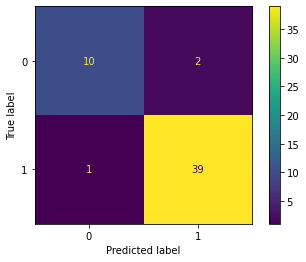

In [108]:
disp.plot()

This model shows **Sensitivity (TPR)** of 97% and **Specificity (TNR)** of 83% and an **overall accuracy** of 94%. 

### Deep learning Model

In [15]:
df = pd.read_csv("mfp.csv",sep="\t")

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,label
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X = df.drop("label",axis=1).values

In [19]:
y= df["label"].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor="val_loss",patience=20,mode="min")

In [23]:
model = Sequential()

model.add(Dense(146,activation="sigmoid"))
model.add(Dense(73,activation="sigmoid"))
model.add(Dense(35,activation="sigmoid"))

### This is a binary classification

model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy")

2022-04-11 22:31:15.662103: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
7/7 [==============================] - 1s 23ms/step - loss: 0.8469 - val_loss: 0.6689
Epoch 2/600
7/7 [==============================] - 0s 4ms/step - loss: 0.6133 - val_loss: 0.5558
Epoch 3/600
7/7 [==============================] - 0s 5ms/step - loss: 0.5507 - val_loss: 0.5334
Epoch 4/600
7/7 [==============================] - 0s 5ms/step - loss: 0.5416 - val_loss: 0.5328
Epoch 5/600
7/7 [==============================] - 0s 6ms/step - loss: 0.5415 - val_loss: 0.5313
Epoch 6/600
7/7 [==============================] - 0s 6ms/step - loss: 0.5366 - val_loss: 0.5255
Epoch 7/600
7/7 [==============================] - 0s 6ms/step - loss: 0.5284 - val_loss: 0.5200
Epoch 8/600
7/7 [==============================] - 0s 5ms/step - loss: 0.5216 - val_loss: 0.5147
Epoch 9/600
7/7 [==============================] - 0s 5ms/step - loss: 0.5158 - val_loss: 0.5085
Epoch 10/600
7/7 [==============================] - 0s 6ms/step - loss: 0.5059 - val_loss: 0.4992
Epoch 11/600
7/7 [==========

<AxesSubplot:>

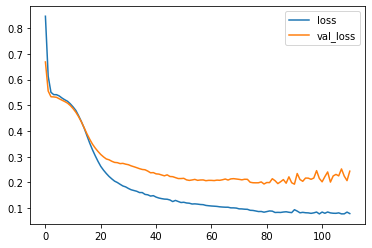

In [25]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [36]:
model= Sequential()

model.add(Dense(146,activation="sigmoid"))
model_.add(Dropout(0.5))
model.add(Dense(73,activation="sigmoid"))
model_.add(Dropout(0.5))
model.add(Dense(53,activation="sigmoid"))
model_.add(Dropout(0.5))
model.add(Dense(22,activation="sigmoid"))
### This is a binary classification

model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy")

In [37]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop],batch_size=64)

Epoch 1/600
4/4 [==============================] - 0s 37ms/step - loss: 0.6026 - val_loss: 0.5667
Epoch 2/600
4/4 [==============================] - 0s 8ms/step - loss: 0.5675 - val_loss: 0.5475
Epoch 3/600
4/4 [==============================] - 0s 10ms/step - loss: 0.5540 - val_loss: 0.5398
Epoch 4/600
4/4 [==============================] - 0s 9ms/step - loss: 0.5467 - val_loss: 0.5381
Epoch 5/600
4/4 [==============================] - 0s 8ms/step - loss: 0.5453 - val_loss: 0.5370
Epoch 6/600
4/4 [==============================] - 0s 9ms/step - loss: 0.5447 - val_loss: 0.5361
Epoch 7/600
4/4 [==============================] - 0s 10ms/step - loss: 0.5433 - val_loss: 0.5349
Epoch 8/600
4/4 [==============================] - 0s 10ms/step - loss: 0.5417 - val_loss: 0.5335
Epoch 9/600
4/4 [==============================] - 0s 11ms/step - loss: 0.5396 - val_loss: 0.5318
Epoch 10/600
4/4 [==============================] - 0s 10ms/step - loss: 0.5373 - val_loss: 0.5298
Epoch 11/600
4/4 [=====

<AxesSubplot:>

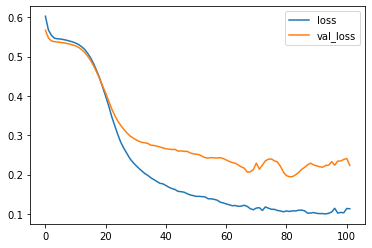

In [38]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [44]:
y_pred= pd.DataFrame(model.predict(X_test) > 0.5).astype("int32")

In [45]:
precision_score(y_test,y_pred)

0.926829268292683

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78        12
         1.0       0.93      0.95      0.94        40

    accuracy                           0.90        52
   macro avg       0.87      0.85      0.86        52
weighted avg       0.90      0.90      0.90        52

